In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
matches_2 = pd.read_csv(R'D:\python files\pandas exercise\working file\new_ipl\matches.csv')
matches_2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries_2 = pd.read_csv(R'D:\python files\pandas exercise\working file\new_ipl\deliveries.csv')
deliveries_2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
for i in range(len(matches_2)):
    set1 = []
    set2 = []
    set1 = set(set1)
    set2 = set(set2)
    set1.update([matches_2['team1'][i],matches_2['team2'][i]])
    set2.update([matches_2['winner'][i]])
    matches_2.loser[i] = list(set1 -set2)[0]
    

In [4]:
print 'Total matches_2:',matches_2.shape[0]
print ' \n Venues Played :',matches_2['city'].unique()
print ' \n Teams :',matches_2['team1'].unique()
print ' \n Teams :',matches_2['team1'].nunique()
print ' \n Venues:',matches_2['city'].nunique()

Total matches_2: 636
 
 Venues Played : ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
 
 Teams : ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']
 
 Teams : 14
 
 Venues: 30


In [ ]:
temp_df = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

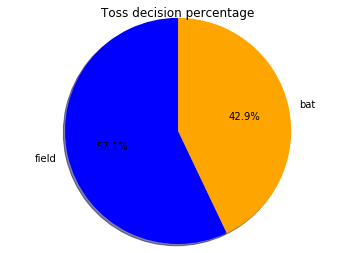

In [10]:
#overall toss_decision
temp_series = matches_2.toss_decision.value_counts(normalize = True)
#print temp_series
#print temp_series
labels = (np.array(temp_series.index))
sizes = (np.array(temp_series))
#print sizes
#colors = ['gold', 'lightskyblue']
plt.axis("equal")
plt.pie(sizes, labels=labels, colors=['blue','orange'],
    autopct='%1.1f%%', shadow=True, startangle=90,radius =1.3)
plt.title("Toss decision percentage")
plt.show()
          

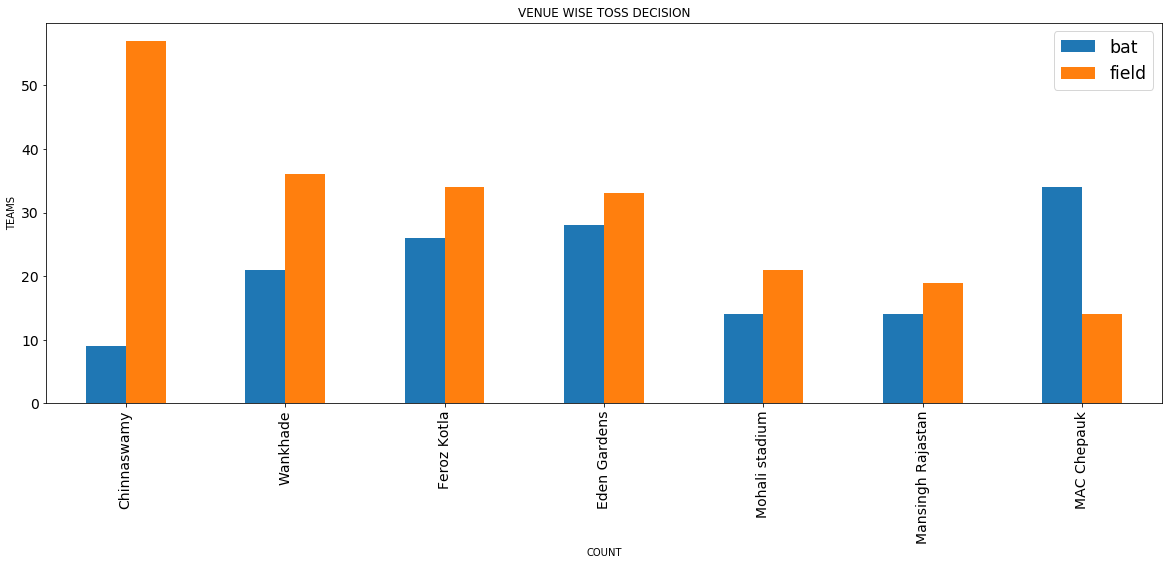

In [11]:
#venuewise
venue_wise =pd.crosstab(matches_2.venue,matches_2.toss_decision).sort_values('field',ascending = False).iloc[[0,1,2,3,5,6,7],:]
venue_wise.index =['Chinnaswamy','Wankhade','Feroz Kotla','Eden Gardens','Mohali stadium','Mansingh Rajastan','MAC Chepauk']
venue_wise.plot(kind ='bar',figsize=(20,7))
plt.ylabel("TEAMS")
plt.xlabel('COUNT')
plt.title("VENUE WISE TOSS DECISION")
plt.legend(fontsize ='xx-large')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\venue_wise.png",pad_inches=3)
plt.show()

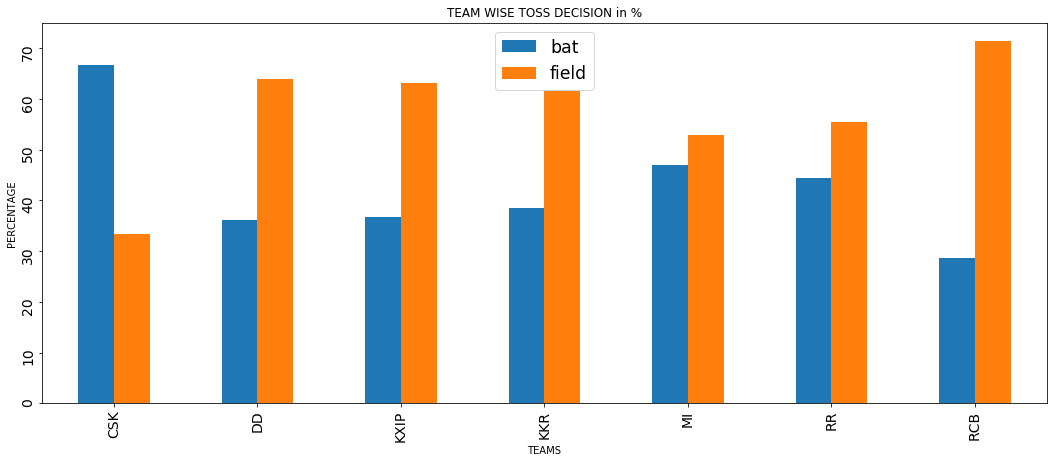

In [13]:
#teamwise toss
teamwise = pd.crosstab(matches_2.toss_winner,matches_2.toss_decision).iloc[[0,2,4,6,7,9,12],:]
teamwise

teamwise['total'] = teamwise['bat'] + teamwise['field']
teamwise['total'] = teamwise['total'].astype('float')
teamwise['bat'] = (teamwise['bat']/teamwise['total']) * 100
teamwise['field']=(teamwise['field']/teamwise['total']) * 100
teamwise

teamwise.drop("total",inplace=True,axis=1)
teamwise =teamwise.applymap(lambda x:round(x,2))


teamwise.index = ['CSK','DD','KXIP','KKR','MI','RR','RCB']
ax =teamwise.plot(kind ='bar',figsize=(18,7))
"""for p in ax.patches:
    ax.annotate(format(p.get_height()+1), (p.get_x()+0.1, p.get_height()+1))"""
plt.xlabel("TEAMS")
plt.ylabel('PERCENTAGE')
plt.title("TEAM WISE TOSS DECISION in %")
plt.legend(fontsize ='xx-large')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=90)
plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\teamwise.png")
plt.show()


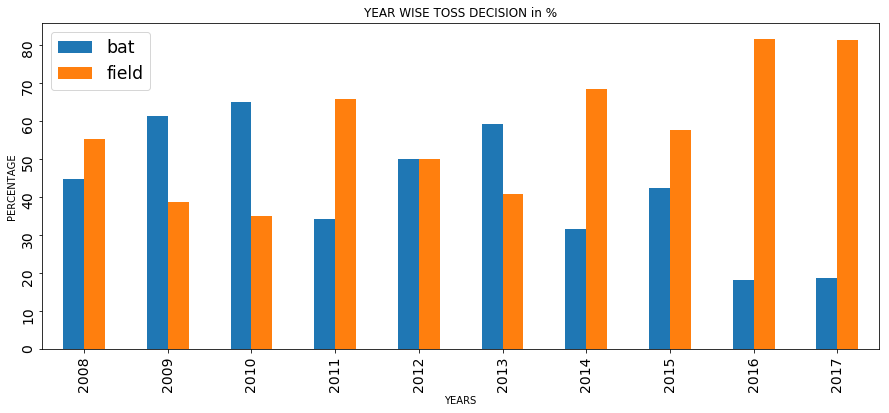

In [12]:
#yearwise toss
yearwise =pd.crosstab(matches_2.season,matches_2.toss_decision)
yearwise['total'] = yearwise['bat'] + yearwise['field']
yearwise['total'] = yearwise['total'].astype('float')
yearwise['bat'] = (yearwise['bat']/yearwise['total']) * 100
yearwise['field']=(yearwise['field']/yearwise['total']) * 100

yearwise.drop("total",inplace=True,axis=1)
yearwise =yearwise.applymap(lambda x:round(x,2))

ax = yearwise.plot(kind = 'bar',figsize=(15,6))
"""for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))"""

plt.xlabel("YEARS")
plt.ylabel('PERCENTAGE')
plt.title("YEAR WISE TOSS DECISION in %")
plt.legend(fontsize ='xx-large')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=90)
plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\teamwise.png")
plt.show()


In [19]:
#toss decision influence
(matches_2.toss_winner == matches_2.winner).value_counts(normalize = True)

True     0.511006
False    0.488994
dtype: float64

In [20]:
#individual batsman wagon wheel
batsman_runs = deliveries_2.pivot_table(index=['batsman'],columns='batsman_runs',values='ball',aggfunc=len)
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

tls.set_credentials_file(username='rspmharimurugesan',api_key='YeBfzYl6R37nKLMf1u6j')

In [29]:
any_batsman = batsman_runs.loc[batsman_runs.index.str.contains('Raina',case=False)].T
any_batsman

batsman,SK Raina
batsman_runs,
0,1163.0
1,1377.0
2,242.0
3,10.0
4,402.0
5,1.0
6,174.0


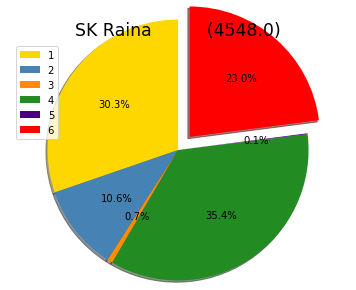

In [30]:
#individual player wagon wheel
title = any_batsman.columns[0]
any_batsman.columns = ['RUNS']
any_batsman['RUNS'] = any_batsman['RUNS'] * any_batsman.index
any_batsman.fillna(0,inplace=True)
import numpy as np
labels = any_batsman.index[1:]
sizes = any_batsman.RUNS.values[1:]


#plt.subplot(211)
#plt.figure(figsize=(5,6))
colors = ['gold', '#4682B4','#FF8C00','#228B22','#4B0082','#FF0000']
plt.axis('equal')
plt.pie(sizes,colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=90,radius = 1.5,explode  =[0,0,0,0,0,0.2])
plt.title(title+ 10 * ' '+'(' +str(sizes.sum()) + ')',fontsize ='xx-large')
plt.legend(labels)
#plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\dhoni.png",pad_inches=1)
plt.show()

In [32]:
deliveries_2.drop_duplicates(subset=['match_id'])['batting_team'].value_counts()

Mumbai Indians                 82
Chennai Super Kings            77
Kings XI Punjab                77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: batting_team, dtype: int64

In [46]:
#batting average for team bat first
a=deliveries_2.loc[deliveries_2.inning==1].pivot_table(index = ['batting_team'],columns=['over'],values = 'total_runs',aggfunc='sum').T.sum().reset_index().rename(columns={0:'runs'})
b=deliveries_2.drop_duplicates('match_id').pivot_table(index=['batting_team'],values ='inning',aggfunc='count').reset_index()
ab=pd.merge(a,b,on='batting_team',how = 'inner')
ab.inning = ab.inning.astype('float')
ab['batting_ave']=ab.runs/ab.inning
ab.iloc[[0,2,4,6,7,9,12]].sort_values('batting_ave',ascending=False).reset_index(drop = True)


,batting_team,runs,inning,batting_ave
0,Royal Challengers Bangalore,11705,70.0,167.214286
1,Chennai Super Kings,12693,77.0,164.844156
2,Mumbai Indians,13387,82.0,163.256098
3,Kings XI Punjab,12288,77.0,159.584416
4,Rajasthan Royals,8470,54.0,156.851852
5,Kolkata Knight Riders,10542,68.0,155.029412
6,Delhi Daredevils,9625,63.0,152.777778


In [56]:
matches_2_c =pd.merge(deliveries_2.drop_duplicates("match_id")[['match_id','batting_team','bowling_team']].reset_index(drop =True),matches_2,left_on ='match_id',right_on='id')

In [59]:
%matplotlib inline
(matches_2_c['batting_team'] == matches_2_c['winner']).value_counts(normalize =True)

False    0.553459
True     0.446541
dtype: float64

In [60]:
(matches_2_c['bowling_team'] == matches_2_c['winner']).value_counts(normalize =True)

True     0.548742
False    0.451258
dtype: float64

In [98]:
# win probability 
bat_team =matches_2_c.loc[(matches_2_c['batting_team'] == "Delhi Daredevils")]
print "Batting First win Probability :", round((bat_team.loc[(bat_team['winner'] == "Delhi Daredevils")].shape[0]/float(bat_team.shape[0])),2)

bowl_team =matches_2_c.loc[(matches_2_c['bowling_team'] == "Delhi Daredevils")]
print "Bowling First Win Probability :", round((bowl_team.loc[(bowl_team['winner'] == "Delhi Daredevils")].shape[0]/float(bowl_team.shape[0])),2)
#.value_counts(normalize =True)
#.value_counts(normalize =True)

Batting First win Probability : 0.33
Bowling First Win Probability : 0.49


In [ ]:
%matplotlib inline
delivery[['batsman',"batsman_runs"]].groupby('batsman').sum().sort_values(by ='batsman_runs',ascending = False)[:15].plot(kind = 'bar')
plt.xlabel('players')
plt.ylabel('runs')
plt.title('Top run scorers in ipl')


In [ ]:
#death overs top performers
%matplotlib inline
death_overs = deliveries_2.pivot_table(index = ['batsman'],columns=['over'],values = 'total_runs',aggfunc='sum').fillna(0).loc[:,16:]
death_overs['total'] = death_overs[16] + death_overs[17] + death_overs[18] + death_overs[19] + death_overs[20]
death_overs['total'] = death_overs[16] + death_overs[17] + death_overs[18] + death_overs[19] + death_overs[20]
death_overs = death_overs.sort_values(by = 'total',ascending=False)[:10].iloc[:,:-1]
death_overs.index = ['Dhoni','Pollard','RSharma','ABD','V Kohli','YPathan','Yuvi','Duminy','Raina','Jadeja']
death_overs.plot(kind = 'bar',figsize=(19,7))
plt.legend(fontsize ='xx-large')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=90)
plt.xlabel("PLAYERS")
plt.ylabel("RUNS")
plt.title("BEST BATSMAN IN DEATH OVERS -(OVER WISE COMPARISON)")
plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\death_over bastman",pad_inches=0.1)
plt.show()

In [ ]:
# powerplay top performers
powerplay_batting = deliveries_2.pivot_table(index = ['batsman'],columns=['over'],values = 'total_runs',aggfunc='sum').fillna(0).loc[:,1:6]
powerplay_batting['total'] = powerplay_batting[1] + powerplay_batting[2] + powerplay_batting[3] + powerplay_batting[4] + powerplay_batting[5] +powerplay_batting[6]
powerplay_batting = powerplay_batting.sort_values(by = 'total',ascending=False)[:10].iloc[:,:-1]
powerplay_batting.index =['Gambir','Warner','Gayle','Dhawan','Sehwag','Parthiv','Mculum','Uthappa','Mvijay','Rahane']
powerplay_batting.plot(kind = 'bar',figsize=(19,7))
plt.legend(fontsize ='xx-large')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=90)
plt.xlabel("PLAYERS")
plt.ylabel("RUNS")
plt.title("BEST BATSMAN IN POWERPLAY -(OVER WISE COMPARISON)")
plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\powerplay bastman",pad_inches=5)
plt.show()

In [ ]:
deliveries_2.loc[deliveries_2.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled'])].bowler.value_counts()[:10]

In [ ]:
deliveries_2.loc[deliveries_2.dismissal_kind == 'stumped'].fielder.value_counts()[:10]

In [ ]:
delivery.loc[delivery.dismissal_kind.isin(["lbw"])].bowler.value_counts()[:10]

In [ ]:
deliveries_2.loc[deliveries_2.dismissal_kind.isin(["caught and bowled"])].bowler.value_counts()[:10]

In [ ]:
deliveries_2.loc[deliveries_2.dismissal_kind.isin(["caught"])].bowler.value_counts()[:10]

In [ ]:
deliveries_2.loc[deliveries_2.dismissal_kind.isin(["run out"])].fielder.value_counts()[:10]

In [ ]:
deliveries_2.dismissal_kind.value_counts()

In [16]:
mixed_catchers=dict(deliveries_2.loc[deliveries_2.dismissal_kind.isin(["caught"])].fielder.value_counts()[:10])

top_5_catchers =set(dict(deliveries_2.loc[deliveries_2.dismissal_kind.isin(["caught"])].fielder.value_counts()[:10]).keys())-set(["KD Karthik","PA Patel","MS Dhoni","RV Uthappa","AC Gilchrist","NV Ojha"])

catchers ={}
for i in top_5_catchers:
    catchers.update({i:mixed_catchers[i]})

pd.DataFrame([catchers]).T.rename(columns ={0:"catches"}).sort_values('catches',ascending = False)

,catches
SK Raina,83
AB de Villiers,81
RG Sharma,70
KA Pollard,64
V Kohli,60


In [17]:
deliveries_2["wicket"]=np.where(((deliveries_2.dismissal_kind == u'caught' )| (deliveries_2.dismissal_kind == u'bowled')|(deliveries_2.dismissal_kind == u'lbw')| (deliveries_2.dismissal_kind == u'caught and bowled')),1,0) 

deliveries_2.pivot_table(values=['wicket'], index=['bowler'], columns='over', aggfunc='sum').fillna(0)

first_five_overs_bowling =deliveries_2.pivot_table(values='wicket', index=['bowler'], columns='over', aggfunc='sum').fillna(0).iloc[:,0:5]

first_five_overs_bowling['total'] = first_five_overs_bowling[1] + first_five_overs_bowling[2] + first_five_overs_bowling[3] + first_five_overs_bowling[4] + first_five_overs_bowling[5]


first_five_overs_bowling.sort_values('total',ascending=False)[:15]


over,1,2,3,4,5,total
bowler,,,,,,
Z Khan,12.0,6.0,15.0,7.0,10.0,50.0
P Kumar,15.0,2.0,12.0,4.0,5.0,38.0
A Nehra,5.0,9.0,6.0,11.0,7.0,38.0
B Kumar,15.0,7.0,9.0,2.0,4.0,37.0
Sandeep Sharma,9.0,2.0,13.0,5.0,7.0,36.0
I Sharma,1.0,9.0,4.0,14.0,4.0,32.0
RP Singh,1.0,11.0,9.0,8.0,3.0,32.0
DS Kulkarni,1.0,12.0,1.0,12.0,6.0,32.0
AB Dinda,6.0,3.0,9.0,6.0,7.0,31.0


In [18]:



last_five_over_bowlers = deliveries_2.pivot_table(values='wicket', index=['bowler'], columns='over', aggfunc='sum').fillna(0).iloc[:,-5:]

last_five_over_bowlers['total'] = last_five_over_bowlers[16] + last_five_over_bowlers[17] + last_five_over_bowlers[18] + last_five_over_bowlers[19] + last_five_over_bowlers[20]

last_five_over_bowlers.sort_values('total',ascending=False)[:15]



over,16,17,18,19,20,total
bowler,,,,,,
SL Malinga,17.0,13.0,18.0,32.0,16.0,96.0
DJ Bravo,8.0,8.0,23.0,9.0,24.0,72.0
B Kumar,10.0,7.0,13.0,13.0,20.0,63.0
A Nehra,8.0,10.0,10.0,12.0,14.0,54.0
DW Steyn,7.0,15.0,6.0,13.0,7.0,48.0
SP Narine,7.0,8.0,13.0,9.0,8.0,45.0
R Vinay Kumar,3.0,7.0,6.0,9.0,20.0,45.0
RP Singh,2.0,8.0,11.0,10.0,14.0,45.0
UT Yadav,6.0,7.0,11.0,11.0,10.0,45.0


In [ ]:
deliveries_2=pd.merge(deliveries_2,matches_2[['id','season']],how ='inner',left_on ='match_id',right_on='id')

In [ ]:
#TOP RUN SCORERS YEARWISE SCORE
%matplotlib inline
deliveries_2.groupby(['batsman','season'])['batsman_runs'].sum().reset_index().loc[deliveries_2.groupby(['batsman','season'])['batsman_runs'].sum().reset_index().batsman.isin(Top_batsman_score.batsman[:10].values)].groupby(['season','batsman'])['batsman_runs'].sum().unstack().plot(figsize = (18,9),marker = 'o',grid =True)
plt.xlim(2008,2017)
plt.xlabel('YEARS')
plt.ylabel('TOTAL RUNS')
plt.title("YEAR WISE RUNS SCORED BY TOP 10 RUN SCORERS")
plt.legend(fontsize  = 'x-large')
plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\year_runs.png",pad_pad_inches=0.5)
plt.show()

In [ ]:
# top bowlers yearwise wickets
deliveries_2.groupby(['bowler','season'])['wicket'].sum().reset_index().loc[deliveries_2.groupby(['bowler','season'])['wicket'].sum().reset_index().bowler.isin([u'SL Malinga', u'DJ Bravo', u'PP Chawla', u'Harbhajan Singh',u'A Mishra', u'B Kumar', u'A Nehra', u'R Vinay Kumar', u'Z Khan',u'R Ashwin'])].groupby(['bowler','season'])['wicket'].sum().unstack().unstack().unstack().plot(figsize = (18,9),marker = 'D',grid = True)
plt.xlim(2008,2017)
plt.xlabel('YEARS')
plt.ylabel('TOTAL WICKETS')
plt.title("YEAR WISE RUNS SCORED BY TOP 10 RUN SCORERS")
plt.legend(fontsize  = 'x-large')
plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\year_runs.png",pad_inches=0.5)
plt.show()

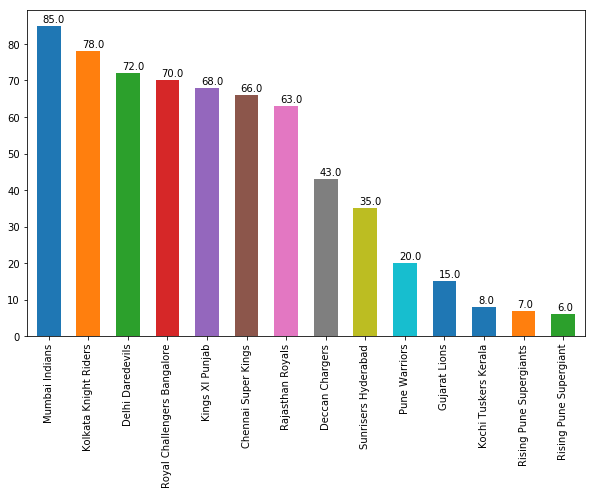

In [19]:
plt.subplots(figsize=(10,6))
ax=matches_2['toss_winner'].value_counts().plot.bar(width=0.6)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

# to dos
# team head to head  viz
# players runs and six and four comparison viz 
# code adjustment and check
# create presentation
     # What is  Data?
     # why analyse data?
     # why you need Data analytics?
      # why visualize?
          # need to collect information about visual impact
          # getting visuals 
          # visual jornalism
          # analying gramenar case study